# Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_curve, auc


# Data Processing

In [5]:
df = pd.read_csv("data/accidents.csv")

In [6]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [9]:
irrelevant_columns = ["ID", "Description", "Street", "City", "County", "State", "Zipcode", "Country", "Airport_Code", "Weather_Timestamp"]
df = df.drop(columns=irrelevant_columns, errors='ignore')

df = df.fillna(df.median(numeric_only=True))  # Fill numerical columns with median
df = df.fillna(df.mode().iloc[0])  # Fill categorical columns with mode

# Encode categorical features
categorical_columns = df.select_dtypes(include=["object", "bool"]).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])


# Model

In [ ]:
# Define features and target
X = df.drop(columns=["Severity"])
y = df["Severity"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation

Accuracy: 0.8794846795485997
F1 Score: 0.8748019056294422
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.68      0.71     13509
           2       0.91      0.95      0.93   1230523
           3       0.75      0.65      0.70    260525
           4       0.53      0.36      0.43     41122

    accuracy                           0.88   1545679
   macro avg       0.73      0.66      0.69   1545679
weighted avg       0.87      0.88      0.87   1545679

Confusion Matrix:
 [[   9251    3139    1096      23]
 [   2469 1164883   51447   11724]
 [    840   87691  170419    1575]
 [     46   22799    3429   14848]]


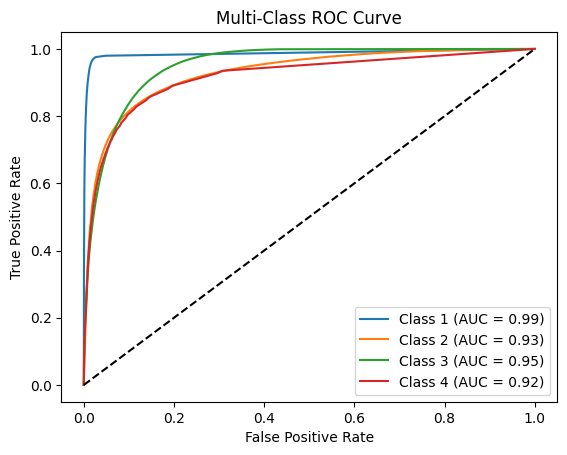

In [11]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute AUC-ROC curve
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_pred_prob = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='best')
plt.show()
